# Homework PyTorch Diabetes

https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Homework instruction: diabetes classification:

Here is the Practical Activity regarding the PyTorch library:
Use the diabetes.csv attached to this class in order to classify whether or not a person has diabetes. You can see here more information about the dataset.

Hints:

•	Upload the .csv file into the Google Colab environment

•	Use the pandas library in order to load the csv file - check the read_csv function

•	It's a binary classification problem, class 0 (no disease) and class 1 (disease)

•	You need to normalize the data, check the MinMaxScaler from sklearn.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


## Loading the dataset

In [3]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8 MB 22 kB/s 
     |████████████████████████████████| 6.6 MB 64.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.5.0+cu101 which

In [4]:
import torch
torch.__version__

'1.5.0+cu101'

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [7]:
diabetes = pd.read_csv('diabetes.csv')

In [8]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
inputs = diabetes.iloc[:, 0:8].values
inputs.shape

(768, 8)

In [10]:
inputs

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [12]:
inputs

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [13]:
outputs = diabetes.iloc[:,8].values
outputs

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [14]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.20)

In [15]:
X_train.shape

(614, 8)

In [16]:
X_test.shape

(154, 8)

## Data transformation


In [17]:
type(X_train)

numpy.ndarray

In [18]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype = torch.float)

In [19]:
type(X_train)

torch.Tensor

In [20]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [21]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [22]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure

In [23]:
(8 + 1) / 2

4.5

In [24]:
# 8 -> 5 -> 5 -> 1
network = nn.Sequential(nn.Linear(8, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 1),
                          nn.Sigmoid())

In [25]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [26]:
loss_function = nn.BCELoss()

In [27]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

In [28]:
epochs = 2000
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    optimizer.zero_grad()

    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch   1: loss 0.66184
Epoch   2: loss 0.65127
Epoch   3: loss 0.64998
Epoch   4: loss 0.64729
Epoch   5: loss 0.64244
Epoch   6: loss 0.63367
Epoch   7: loss 0.61938
Epoch   8: loss 0.60091
Epoch   9: loss 0.58244
Epoch  10: loss 0.56705
Epoch  11: loss 0.55498
Epoch  12: loss 0.54535
Epoch  13: loss 0.53731
Epoch  14: loss 0.53029
Epoch  15: loss 0.52391
Epoch  16: loss 0.51793
Epoch  17: loss 0.51224
Epoch  18: loss 0.50683
Epoch  19: loss 0.50178
Epoch  20: loss 0.49719
Epoch  21: loss 0.49315
Epoch  22: loss 0.48968
Epoch  23: loss 0.48673
Epoch  24: loss 0.48426
Epoch  25: loss 0.48219
Epoch  26: loss 0.48043
Epoch  27: loss 0.47894
Epoch  28: loss 0.47766
Epoch  29: loss 0.47653
Epoch  30: loss 0.47553
Epoch  31: loss 0.47462
Epoch  32: loss 0.47379
Epoch  33: loss 0.47301
Epoch  34: loss 0.47229
Epoch  35: loss 0.47161
Epoch  36: loss 0.47096
Epoch  37: loss 0.47034
Epoch  38: loss 0.46975
Epoch  39: loss 0.46918
Epoch  40: loss 0.46865
Epoch  41: loss 0.46813
Epoch  42: loss 

## Evaluate

In [29]:
network.eval()

Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [30]:
X_test = torch.tensor(X_test, dtype=torch.float)

In [31]:
predictions = network.forward(X_test)

In [32]:
predictions

tensor([[9.9972e-01],
        [2.3615e-01],
        [2.4651e-01],
        [9.9780e-01],
        [9.3357e-02],
        [5.6443e-03],
        [1.9993e-01],
        [9.9984e-01],
        [4.7229e-01],
        [5.3334e-04],
        [9.0116e-03],
        [5.1698e-01],
        [5.0906e-01],
        [7.2133e-04],
        [1.6928e-01],
        [5.4408e-05],
        [5.5646e-02],
        [1.8075e-08],
        [4.0451e-01],
        [5.6221e-01],
        [3.1149e-01],
        [2.8012e-01],
        [9.9977e-01],
        [9.7627e-01],
        [9.6177e-05],
        [2.4846e-01],
        [1.0700e-01],
        [1.0000e+00],
        [2.1483e-01],
        [6.1153e-05],
        [9.9767e-01],
        [8.2462e-01],
        [1.7584e-01],
        [2.1306e-01],
        [1.1638e-01],
        [1.0000e+00],
        [9.9528e-01],
        [9.9995e-01],
        [1.9430e-03],
        [1.0000e+00],
        [2.0546e-03],
        [2.4281e-05],
        [5.8140e-02],
        [6.4338e-01],
        [1.2243e-04],
        [2

In [33]:
predictions = (predictions >= 0.5)
predictions

tensor([[ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False

In [34]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [35]:
accuracy_score(y_test, predictions.detach().numpy())

0.7792207792207793

In [36]:
cm = confusion_matrix(y_test, predictions.detach().numpy())
cm

array([[90, 15],
       [19, 30]])

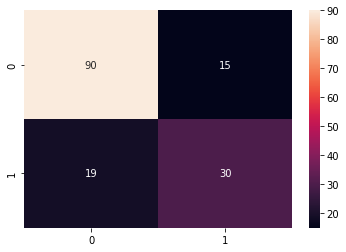

In [37]:
import seaborn as sns
sns.heatmap(cm, annot=True)

**Conclusion: after running our model we have received 78 % accuracy and can see that 90 were classified correctly as class 0 and 15 wrong as class 1 and 30 correct as class 1 and 19 wrong as class 0. **